In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataset
vct = pd.read_csv('vlrscrape1.3.csv')

In [3]:
# Show the first five rows of the dataframe
vct.head()

,Date,VS,Winner,Scoreline,Series Type,Map,Player,Agent,R,ACS,K,D,A,KD +/-,KAST,ADR,HS%,FK,FD,FKFD +/-,R_all,R_attack,R_defend,ACS_all,ACS_attack,ACS_defend,K_all,K_attack,K_defend,D_all,D_attack,D_defend,A_all,A_attack,A_defend,KD +/-_all,KD +/-_attack,KD +/-_defend,KAST_all,KAST_attack,KAST_defend,ADR_all,ADR_attack,ADR_defend,HS%_all,HS%_attack,HS%_defend,FK_all,FK_attack,FK_defend,FD_all,FD_attack,FD_defend,FKFD +/-_all,FKFD +/-_attack,FKFD +/-_defend,Team
0,2023-06-17 01:30:00,Paper Rex DRX,Paper Rex,2:0,BO3,All Maps,Jinggg,-,1.37 1.33 1.39,323 314 332,53 25 28,34 16 18,8 5 3,+19 +9 +10,83% 91% 74%,203 191 216,19% 15% 23%,9 6 3,4 1 3,+5 +5 0,1.37,1.33,1.39,323,314,332,53,25,28,34,16,18,8,5,3,19,9,10,83%,91%,74%,203,191,216,19%,15%,23%,9,6,3,4,1,3,5,5,0,Paper Rex
1,2023-06-17 01:30:00,Paper Rex DRX,Paper Rex,2:0,BO3,All Maps,mindfreak,-,1.19 0.78 1.58,199 144 254,35 13 22,28 15 13,19 7 12,+7 -2 +9,83% 74% 91%,120 89 151,29% 34% 25%,4 1 3,4 3 1,0 -2 +2,1.19,0.78,1.58,199,144,254,35,13,22,28,15,13,19,7,12,7,-2,9,83%,74%,91%,120,89,151,29%,34%,25%,4,1,3,4,3,1,0,-2,2,Paper Rex
2,2023-06-17 01:30:00,Paper Rex DRX,Paper Rex,2:0,BO3,All Maps,d4v41,-,1.12 1.23 1.02,175 174 177,29 15 14,26 11 15,14 6 8,+3 +4 -1,74% 74% 74%,123 119 128,32% 31% 33%,5 2 3,2 1 1,+3 +1 +2,1.12,1.23,1.02,175,174,177,29,15,14,26,11,15,14,6,8,3,4,-1,74%,74%,74%,123,119,128,32%,31%,33%,5,2,3,2,1,1,3,1,2,Paper Rex
3,2023-06-17 01:30:00,Paper Rex DRX,Paper Rex,2:0,BO3,All Maps,f0rsakeN,-,1.04 1.29 0.77,186 250 124,29 21 8,33 14 19,15 8 7,-4 +7 -11,80% 78% 83%,123 159 87,25% 23% 29%,6 3 3,5 2 3,+1 +1 0,1.04,1.29,0.77,186,250,124,29,21,8,33,14,19,15,8,7,-4,7,-11,80%,78%,83%,123,159,87,25%,23%,29%,6,3,3,5,2,3,1,1,0,Paper Rex
4,2023-06-17 01:30:00,Paper Rex DRX,Paper Rex,2:0,BO3,All Maps,cgrs,-,0.86 0.82 0.89,145 128 162,22 9 13,31 15 16,22 12 10,-9 -6 -3,76% 83% 70%,87 82 92,28% 24% 32%,4 2 2,3 2 1,+1 0 +1,0.86,0.82,0.89,145,128,162,22,9,13,31,15,16,22,12,10,-9,-6,-3,76%,83%,70%,87,82,92,28%,24%,32%,4,2,2,3,2,1,1,0,1,Paper Rex


In [4]:
# Show the number of rows and columns using the shape function
print('Number of rows : ', vct.shape[0])
print('Number of columns : ', vct.shape[1])

Number of rows :  480
Number of columns :  57


In [5]:
# Show the data type
vct.dtypes

Date                object
VS                  object
Winner              object
Scoreline           object
Series Type         object
Map                 object
Player              object
Agent               object
R                   object
ACS                 object
K                   object
D                   object
A                   object
KD +/-              object
KAST                object
ADR                 object
HS%                 object
FK                  object
FD                  object
FKFD +/-            object
R_all              float64
R_attack           float64
R_defend           float64
ACS_all              int64
ACS_attack           int64
ACS_defend           int64
K_all                int64
K_attack             int64
K_defend             int64
D_all                int64
D_attack             int64
D_defend             int64
A_all                int64
A_attack             int64
A_defend             int64
KD +/-_all           int64
KD +/-_attack        int64
K

In [6]:
# Show the statistical summary
vct.describe()

,R_all,R_attack,R_defend,ACS_all,ACS_attack,ACS_defend,K_all,K_attack,K_defend,D_all,D_attack,D_defend,A_all,A_attack,A_defend,KD +/-_all,KD +/-_attack,KD +/-_defend,ADR_all,ADR_attack,ADR_defend,FK_all,FK_attack,FK_defend,FD_all,FD_attack,FD_defend,FKFD +/-_all,FKFD +/-_attack,FKFD +/-_defend
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,1.007604,0.947104,1.066417,198.293750,193.179167,204.508333,21.795833,10.666667,11.129167,21.800000,11.245833,10.554167,9.600000,4.712500,4.887500,-0.004167,-0.579167,0.575000,129.108333,125.279167,132.675000,3.141667,1.366667,1.775000,3.141667,1.775000,1.366667,0.000000,-0.408333,0.408333
std,0.264280,0.360606,0.367754,54.533045,71.309765,74.170260,14.794909,7.757099,8.171440,13.921852,7.509075,6.980526,7.920165,4.300877,4.354329,7.379936,5.051507,5.124606,35.376306,44.745361,47.448847,3.147178,1.851178,1.738487,3.049476,1.976744,1.582437,2.490064,1.762499,1.718113
min,0.210000,0.030000,0.210000,65.000000,18.000000,45.000000,3.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-31.000000,-24.000000,-12.000000,42.000000,14.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-6.000000,-6.000000
25%,0.820000,0.690000,0.807500,159.750000,145.000000,153.000000,12.000000,6.000000,6.000000,14.000000,7.000000,6.000000,4.000000,2.000000,2.000000,-5.000000,-4.000000,-3.000000,103.000000,95.750000,99.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-0.250000
50%,0.995000,0.950000,1.040000,193.000000,186.500000,195.000000,17.000000,9.000000,9.000000,17.000000,9.000000,9.000000,7.000000,4.000000,4.000000,0.000000,-1.000000,0.000000,126.500000,122.000000,129.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.172500,1.200000,1.270000,231.250000,236.250000,241.500000,24.000000,13.000000,13.000000,23.000000,12.000000,11.000000,12.000000,6.000000,7.000000,4.000000,3.000000,4.000000,153.000000,152.250000,157.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,1.000000
max,1.800000,2.160000,3.070000,369.000000,519.000000,668.000000,99.000000,47.000000,58.000000,86.000000,49.000000,42.000000,61.000000,31.000000,30.000000,29.000000,15.000000,23.000000,248.000000,313.000000,445.000000,22.000000,13.000000,10.000000,22.000000,13.000000,9.000000,13.000000,9.000000,6.000000


In [7]:
# Show the number of missing values
vct.isna().sum()

Date               0
VS                 0
Winner             0
Scoreline          0
Series Type        0
Map                0
Player             0
Agent              0
R                  0
ACS                0
K                  0
D                  0
A                  0
KD +/-             0
KAST               0
ADR                0
HS%                0
FK                 0
FD                 0
FKFD +/-           0
R_all              0
R_attack           0
R_defend           0
ACS_all            0
ACS_attack         0
ACS_defend         0
K_all              0
K_attack           0
K_defend           0
D_all              0
D_attack           0
D_defend           0
A_all              0
A_attack           0
A_defend           0
KD +/-_all         0
KD +/-_attack      0
KD +/-_defend      0
KAST_all           0
KAST_attack        0
KAST_defend        0
ADR_all            0
ADR_attack         0
ADR_defend         0
HS%_all            0
HS%_attack         0
HS%_defend         0
FK_all       

In [8]:
# Show the number of duplicate rows
duplicate_rows_df = vct[vct.duplicated()]
print('Number of duplicate rows: ', duplicate_rows_df.shape[0])

Number of duplicate rows:  0


## 1. What agents were used the most throughout the tournament

In [9]:
# Show the top 5 most used agents
vct['Agent'].value_counts().head()

-          130
Skye        47
Raze        44
Jett        35
Killjoy     33
Name: Agent, dtype: int64

As we can see in this values, there is value that not contain the name of agent, so we need to clear that value.

In [10]:
# Show the unique values in Agent column
vct['Agent'].unique()

array(['-', 'Astra', 'Raze', 'Jett', 'Viper', 'Skye', 'Neon', 'Brimstone',
       'Gekko', 'Harbor', 'Fade', 'Killjoy', 'Breach', 'Sova', 'Cypher',
       'Sage', 'Omen', 'Kayo', 'Chamber', 'Reyna', 'Phoenix'],
      dtype=object)

Then we need to find out another values that not contain agent name

In [11]:
# Drop the values in Agent column that contain (-)
vct_clean1 = vct.loc[vct['Agent'] != '-']

Next step is to clear the values that not contain agent name

In [12]:
# Show the top 5 most used agents
vct_clean1['Agent'].value_counts().head()

Skye       47
Raze       44
Jett       35
Killjoy    33
Viper      30
Name: Agent, dtype: int64

Now we have a value that only contains the agent name

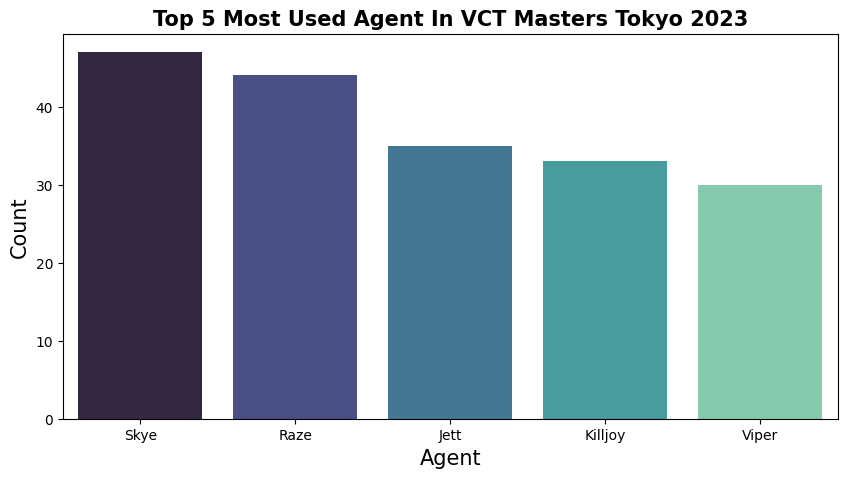

In [13]:
# This code shows the top 5 most used agents in the VCT Masters Tokyo 2023
plt.figure(figsize=(10, 5))
sns.countplot(
    data=vct_clean1,
    x='Agent',
    order=vct_clean1['Agent'].value_counts().sort_values(ascending=False).index[:5],
    palette="mako"
)

# Set the title of the plot
plt.title('Top 5 Most Used Agent In VCT Masters Tokyo 2023', weight='bold', fontsize=15)

# Set the labels for the x-axis and y-axis
plt.xlabel('Agent', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Show the plot
plt.show()

## 2. What agents were used the least throughout the tournament

In [14]:
# Show the top 5 least used agents
vct_clean1['Agent'].value_counts().tail()

Neon       6
Sage       4
Chamber    2
Phoenix    2
Reyna      1
Name: Agent, dtype: int64

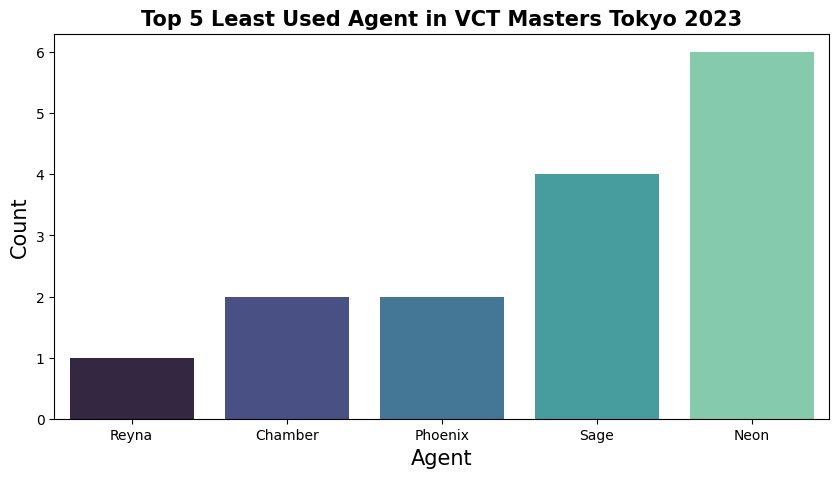

In [15]:
# This code show the top 5 least used agents in the VCT Masters Tokyo 2023

plt.figure(figsize=(10,5))
sns.countplot(
    data=vct_clean1,
    x='Agent',
    order=vct_clean1['Agent'].value_counts().sort_values().index[:5],
    palette='mako'
)

# Set the title of the plot
plt.title('Top 5 Least Used Agent in VCT Masters Tokyo 2023', weight='bold', fontsize=15)

# Set the labels for the x-axis and y-axis
plt.xlabel('Agent', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Show the plot
plt.show()

## 3. What agents were used the most on each map throughout the tournament

In [16]:
# Show the unique values in Agent column
vct_clean1['Map'].unique()

array(['1 Split', '2 Bind', '1 Fracture', '1 Haven', '2 Split', '3 Lotus',
       '2 Ascent', '1 Lotus', '2 Haven', '2 Fracture', '3 Split',
       '3 Bind', '1 Pearl', '2 Lotus', '4 Pearl', '5 Ascent'],
      dtype=object)

As we can see here, the values have the same name, but the calculation will be different because the values start with a number and we need to make the values with the same name count the same.

In [17]:
# This code will remove the leading digits from the Map column in the vct_clean1 DataFrame.
# The `str.replace()` function will replace all strings that start with a digit and a space with an empty string.
vct_clean1['Map'] = vct_clean1['Map'].str.replace('^[0-9]+ ', '')

# Print the Map column to see the results
print(vct_clean1['Map'])

10      Split
11      Split
12      Split
13      Split
14      Split
        ...  
475    Ascent
476    Ascent
477    Ascent
478    Ascent
479    Ascent
Name: Map, Length: 350, dtype: object


Now we already done to change that values

In [18]:
# This code shows the unique values in the 'Map' column of the vct_clean1 DataFrame.
print(vct_clean1['Map'].unique())

['Split' 'Bind' 'Fracture' 'Haven' 'Lotus' 'Ascent' 'Pearl']


In [19]:
# This code first groups the vct_clean1 DataFrame by the 'Map' and 'Agent' columns
# and counts the number of rows in each group. The result is a DataFrame called
# agent_counts.
agent_counts = vct_clean1.groupby(['Map', 'Agent']).size().reset_index(name='count')

# This code then sorts the agent_counts DataFrame by the 'Map' and 'count' columns
# in descending order.
agent_counts_sorted = agent_counts.sort_values(['Map', 'count'], ascending=[True, False])

# This code gets the top 5 agents for each map.
top_agents_per_map = agent_counts_sorted.groupby('Map').head().reset_index(drop=True)

print(top_agents_per_map)

         Map      Agent  count
0     Ascent       Jett      6
1     Ascent       Kayo      6
2     Ascent       Omen      6
3     Ascent       Sova      5
4     Ascent    Killjoy      4
5       Bind       Raze     10
6       Bind       Skye     10
7       Bind  Brimstone      8
8       Bind      Viper      6
9       Bind     Harbor      4
10  Fracture     Breach     13
11  Fracture  Brimstone     11
12  Fracture    Killjoy     11
13  Fracture       Raze     10
14  Fracture       Sova      5
15     Haven       Jett      6
16     Haven     Breach      5
17     Haven    Killjoy      5
18     Haven       Omen      4
19     Haven       Skye      4
20     Lotus       Omen     13
21     Lotus       Raze     12
22     Lotus       Skye     12
23     Lotus    Killjoy      9
24     Lotus      Viper      8
25     Pearl       Jett      4
26     Pearl    Killjoy      4
27     Pearl       Skye      4
28     Pearl      Astra      2
29     Pearl     Harbor      2
30     Split       Skye     14
31     S

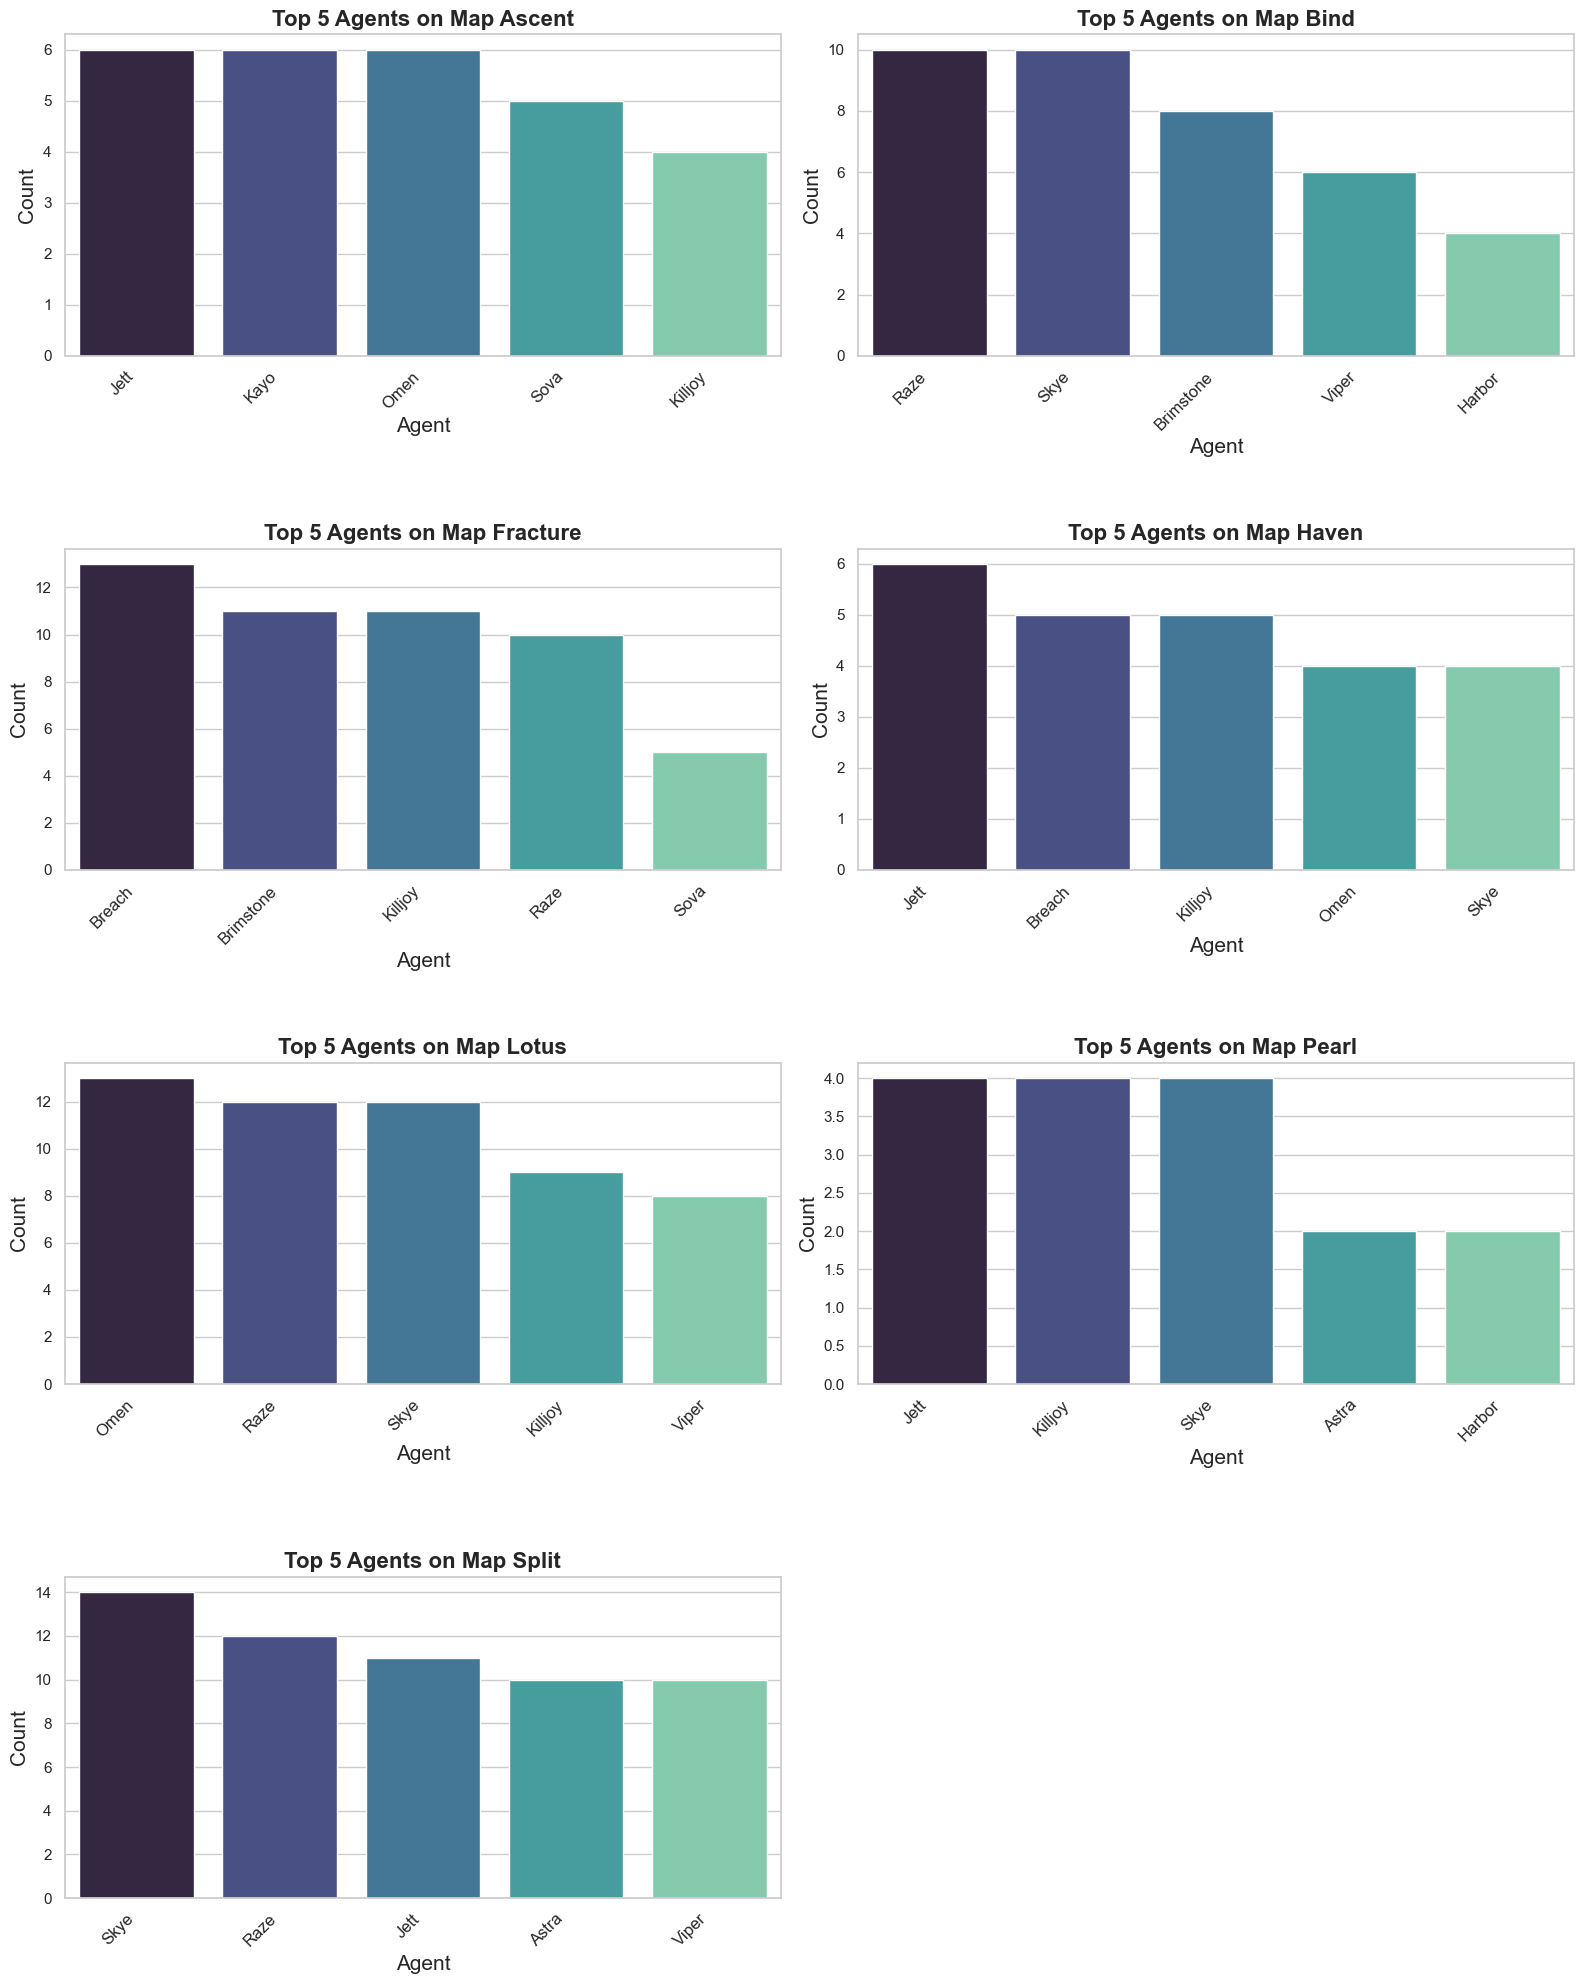

In [20]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create a visualization grid using Seaborn
maps = top_agents_per_map['Map'].unique()

# Calculate the number of rows and columns based on the number of maps
num_maps = len(maps)
rows = (num_maps + 1) // 2 # Calculate the number of rows
cols = 2 # Two columns

fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows)) # Increase figure size

# Flatten the axes to iterate over them
axes = axes.flatten()

for idx, (map_name, ax) in enumerate(zip(maps, axes)):
    map_data = top_agents_per_map[top_agents_per_map['Map'] == map_name]
    
    # Create a bar plot of the number of kills for each agent on the current map
    sns.barplot(
        x='Agent',
        y='count',
        data=map_data,
        palette='mako',
        ax=ax
    )
    
    # Set the labels for the x-axis and y-axis
    ax.set_xlabel('Agent', fontsize=15)
    ax.set_ylabel('Count', fontsize=15)
    
    # Set the title of the plot
    ax.set_title(f'Top 5 Agents on Map {map_name}', fontsize=16, weight="bold")
        
    # Rotate the x-axis labels by 45 degrees to improve readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)

# Remove any empty subplots
if num_maps % 2 != 0:
    axes[-1].remove()
    
# Adjust the layout of the plot
plt.tight_layout()
plt.subplots_adjust(hspace=0.6) # Adjust vertical space between rows

# Save the plot as a PNG image
# plt.savefig('Top_5_Agents_Per_Map.png', bbox_inches='tight')
plt.show()

        

## 4. Which player has the most kills throughout the tournament

In [21]:
# This code first groups the vct_clean1 DataFrame by the 'Player' column and
# sums the K_all values for each player group. The result is a Series
# called player_total_kills.
player_total_kills = vct_clean1.groupby('Player')['K_all'].sum()

# This code then finds the player with  the highest total kills
top_5_players = player_total_kills.nlargest(5)

# This code prints a message that says "Top 5 players with the highest total kills:"
print('Top 5 players with the highest total kills:')

# This code iterates over the rows of the top_5_players Series. For each
# row, the code prints the player's name and total kills value.
for idx, (player, kills) in enumerate(top_5_players.items(), start=1):
    print(f'{idx}. {player} with {kills} kills')

Top 5 players with the highest total kills:
1. Jinggg  with 285 kills
2. Demon1  with 252 kills
3. f0rsakeN  with 243 kills
4. Boostio  with 229 kills
5. jawgemo  with 226 kills


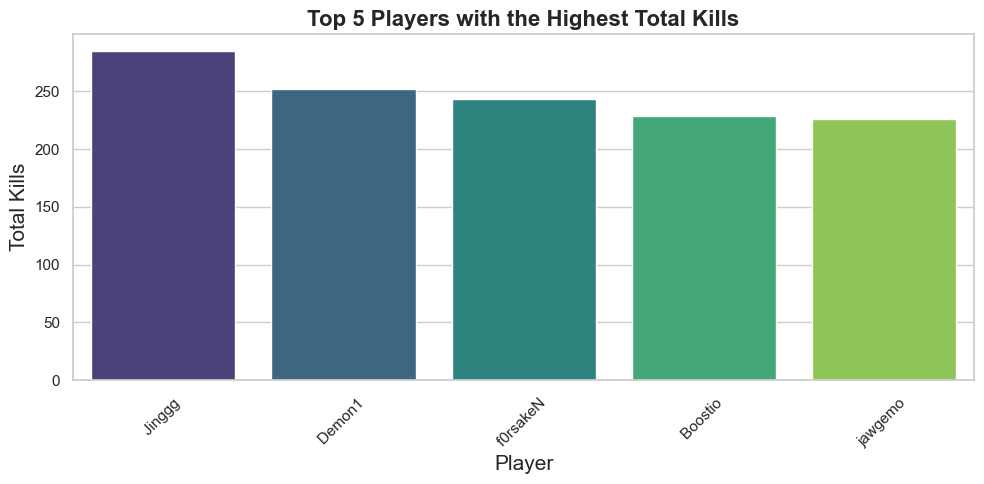

In [22]:
# This code creates a figure with a specific size (width: 10 units, height: 5 units).
plt.figure(figsize=(10, 5))

# This code creates a bar plot using Seaborn. The bar plot shows the total kills
# for the top 5 players. The bar plot is colored using the viridis palette.
sns.barplot(
    x=top_5_players.index,  # The x-axis is the player names.
    y=top_5_players.values,  # The y-axis is the total kills values.
    palette="viridis",  # The bar plot is colored using the viridis palette.
)

# This code sets the label for the x-axis
plt.xlabel('Player', fontsize=15)

# This code sets the label for the y-axis
plt.ylabel('Total Kills', fontsize=15)

# This code sets the title of the plot with a bold font
plt.title('Top 5 Players with the Highest Total Kills', weight='bold',  fontsize=16)

# This code rotates the x-axis labels by 45 degrees to improve readability.
plt.xticks(rotation=45)

# This code adjusts the layout of the plot for better visualization
plt.tight_layout()

# This code shows the plot
plt.show()

## 5. What player that have highest headshot% along the tournament

In [23]:
# This code first removes the percentage sign (%) from the 'HS%_all' column.
vct_clean1['HS%_all'] = vct_clean1['HS%_all'].str.rstrip('%')

# This code then converts the 'HS%_all' column to a numeric data type (float).
vct_clean1['HS%_all'] = vct_clean1['HS%_all'].astype(float)

In [24]:
# This code first groups the vct_clean1 DataFrame by the 'Player' column and
# keeps the player with the highest HS% value for each group. 
# The result is a DataFrame called player_total_hs.
player_total_hs = vct_clean1.groupby('Player')['HS%_all'].max().reset_index()

# This code then sorts the player_total_hs DataFrame by HS% in descending order
# and selects the top 5 rows. The result is a DataFrame called top_5_players.
top_5_players = player_total_hs.sort_values(by='HS%_all', ascending=False).head()

# This code finds the player with the highest HS% value
highest_hs_player = top_5_players.iloc[0]

# This code prints a message that says "Top 5 players with the highest HS%:"
print("Top 5 players with the highest HS%:")

# This code iterates over the rows of the top_5_players DataFrame. For each
# row, the code prints the player's name and HS% value.
for idx, player_info in enumerate(top_5_players.iterrows(), start=1):
    player_index, player_data = player_info
    player_name = player_data['Player']
    player_hs = player_data['HS%_all']
    print(f'{idx}. {player_name} with {player_hs}%')

Top 5 players with the highest HS%:
1. Demon1  with 68.0%
2. soulcas  with 48.0%
3. C0M  with 47.0%
4. Redgar  with 47.0%
5. nobody  with 45.0%


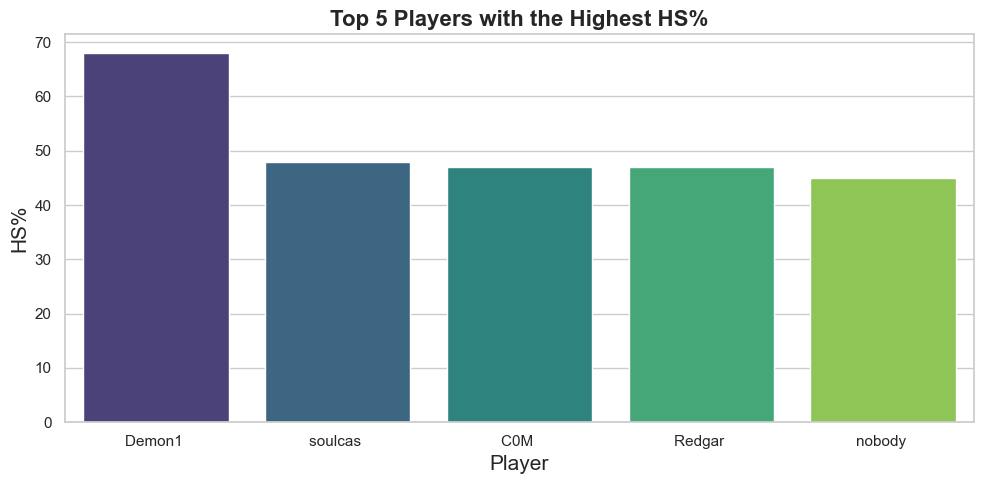

In [25]:
# This code creates a new figure with a size of 10x5 inches
plt.figure(figsize=(10,5))

# This code uses the Seaborn library to create a bar plot of the headshot percentage
# values for the top 5 players. The bar plot is colored using the viridis palette.
sns.barplot(
    x="Player",  # The x-axis is the player names.
    y="HS%_all",  # The y-axis is the headshot percentage values.
    data=top_5_players,  # The data is the top_5_players Series.
    palette="viridis",  # The bar plot is colored using the viridis palette.
)

# This code sets the labels for the x-axis and y-axis
plt.xlabel('Player', fontsize=15)
plt.ylabel('HS%', fontsize=15)

# This code sets the title of the plot 
plt.title('Top 5 Players with the Highest HS%', weight="bold", fontsize=16)

# This code ensures that all of the labels are visible
plt.tight_layout()

# This code shows the plot
plt.show()

## 6. Which player has the highest rating in the tournament

In [26]:
# This code first groups the vct_clean1 DataFrame by the 'Player' column and
# calculates the maximum R_all value for each player. The result is a Series
# called player_total_ratings.
player_total_ratings = vct_clean1.groupby('Player')['R_all'].max()

# This code then takes the first 5 rows of the player_total_ratings Series.
# The result is a Series called top_5_players.
top_5_players = player_total_ratings.nlargest(5)

# This code prints a message that says "Top 5 players with the highest ratings:"
print('Top 5 players with the highest ratings:')

# This code iterates over the rows of the top_5_players Series. For each
# row, the code prints the player's name and R_all value.
for idx, (player, rating) in enumerate(top_5_players.items(), start=1):
  print(f'{idx}. {player} with {rating} ratings')

Top 5 players with the highest ratings:
1. Alfajer  with 1.8 ratings
2. Leo  with 1.79 ratings
3. jawgemo  with 1.76 ratings
4. Chronicle  with 1.71 ratings
5. Derke  with 1.71 ratings


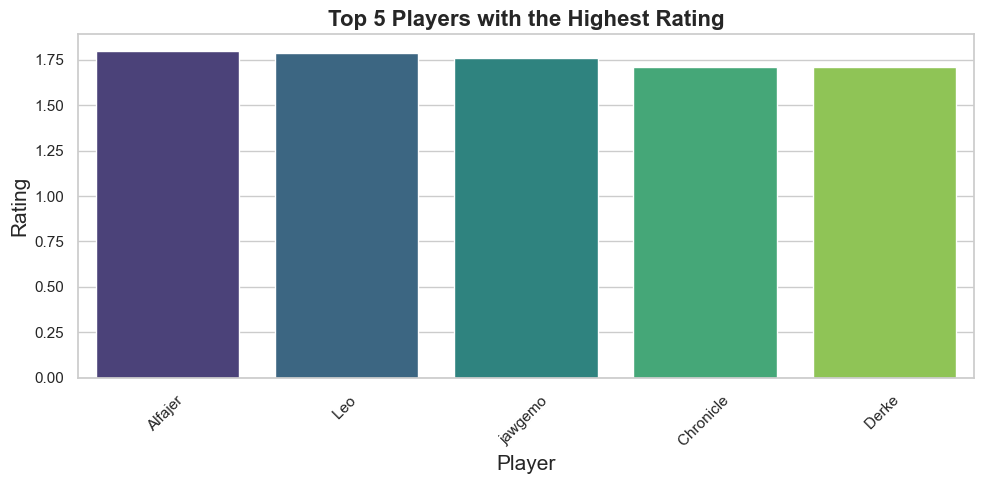

In [27]:
# This code creates a new figure with a size of 10x5 inches
plt.figure(figsize=(10,5))

# This code uses the Seaborn library to create a bar plot of the rating values
# for the top 5 players. The bar plot is colored using the viridis palette.
sns.barplot(
    x=top_5_players.index,  # The x-axis is the player names.
    y=top_5_players.values,  # The y-axis is the rating values.
    palette="viridis",  # The bar plot is colored using the viridis palette.
)

# This code sets the labels for the x-axis and y-axis
plt.xlabel('Player', fontsize=15)
plt.ylabel('Rating', fontsize=15)

# This code sets the title of the plot
plt.title("Top 5 Players with the Highest Rating", weight="bold", fontsize=16)

# This code rotates the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# This code ensures that all of the labels are visible
plt.tight_layout()

# This code shows the plot
plt.show()

## 7. Which player has the highest ACS in the tournament

In [28]:
# This code first groups the vct_clean1 DataFrame by the 'Player' column and
# calculates the maximum ACS_all value for each player. The result is a Series
# called player_total_acs.
player_total_acs = vct_clean1.groupby('Player')['ACS_all'].max()

# This code the takes the first 5 rows of the player_total_acs Series
# The result is a Series called top_5_players
top_5_players = player_total_acs.nlargest(5)

# This code prints a message that says "Top 5 players with the highest ACS:"
print('Top 5 players with the highest ACS:')

# This code iterates over the rows of the top_5_players Series. For each
# row, the code prints the player's name and ACS_all value.
for idx, (player, acs) in enumerate(top_5_players.items(), start=1):
  print(f'{idx}. {player} with {acs} ACS')

Top 5 players with the highest ACS:
1. Derke  with 369 ACS
2. ZmjjKK  with 358 ACS
3. Demon1  with 353 ACS
4. Sayf  with 349 ACS
5. Boostio  with 347 ACS


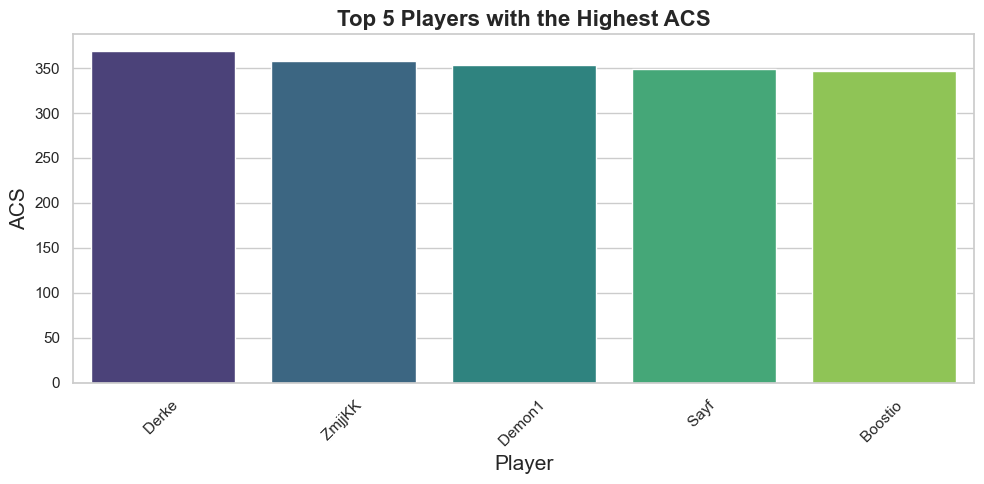

In [29]:
# This code creates a new figure with a size of 10x5 inches
plt.figure(figsize=(10,5))

# This code uses the Seaborn library to create a bar plot of the ACS values
# for the top 5 players. The bar plot is colored using the viridis palette.
sns.barplot(
    x=top_5_players.index,  # The x-axis is the player names.
    y=top_5_players.values,  # The y-axis is the ACS values.
    palette="viridis",  # The bar plot is colored using the viridis palette.
)

# This code sets the labels for the x-axis and y-axis
plt.xlabel('Player', fontsize=15)
plt.ylabel('ACS', fontsize=15)

# This code sets the title of the plot
plt.title("Top 5 Players with the Highest ACS", weight="bold", fontsize=16)

# This code rotates the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# This code ensures that all of the labels are visible
plt.tight_layout()

# This code shows the plot
plt.show()

## 8. Which player has the highest first kill in the tournament

In [30]:
# This code first groups the vct_clean1 DataFrame by the 'Player' column and
# calculates the maximum FK_all value for each player. The result is a Series
# called player_total_first_kill.
player_total_first_kill = vct_clean1.groupby('Player')['FK_all'].max()

# This code then takes the first 5 rows of the player_total_first_kill Series.
# The result is a Series called top_5_players.
top_5_players = player_total_first_kill.nlargest(5)

# This code prints a message that says "Top 5 players with the highest First Kill:"
print('Top 5 players with the highest First Kill:')

# This code iterates over the rows of the top_5_players Series. For each
# row, the code prints the player's name and FK_all value.
for idx, (player, fk) in enumerate(top_5_players.items(), start=1):
  print(f'{idx}. {player} with {fk} First Kill')

Top 5 players with the highest First Kill:
1. ZmjjKK  with 12 First Kill
2. Sayf  with 8 First Kill
3. f0rsakeN  with 8 First Kill
4. Derke  with 7 First Kill
5. Jinggg  with 7 First Kill


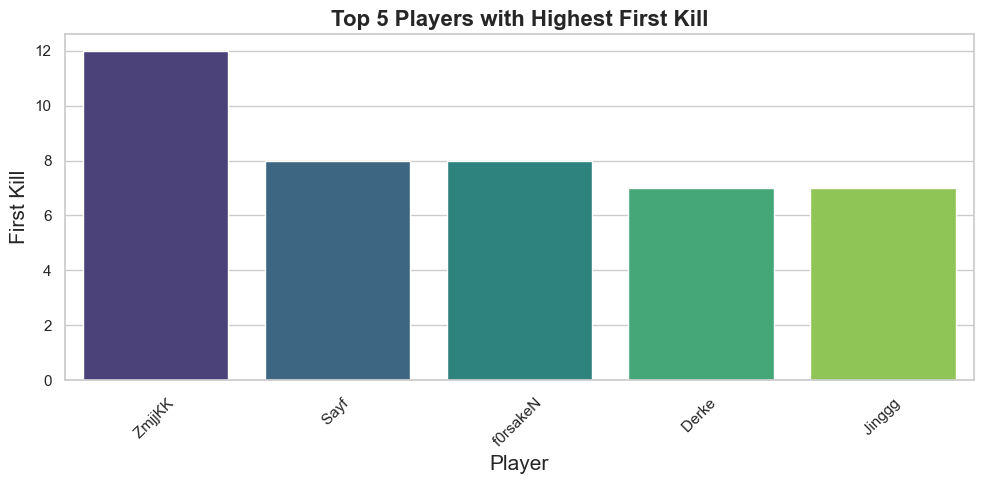

In [31]:
# This code creates a new figure with a size of 10x5 inches
plt.figure(figsize=(10,5))

# This code uses the Seaborn library to create a bar plot of the First Kill
# values for the top 5 players. The bar plot is colored using the viridis palette.
sns.barplot(x=top_5_players.index, y=top_5_players.values, palette='viridis')

# This code sets the labels for the x-axis and y-axis
plt.xlabel('Player', fontsize=15)
plt.ylabel('First Kill', fontsize=15)

# This code sets the title of the plot
plt.title('Top 5 Players with Highest First Kill', weight='bold', fontsize=16)

# This code rotates the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# This code ensures that all of the labels are visible
plt.tight_layout()

# This code shows the plot
plt.show()

## 9. Which player has the highest KAST in the tournament

In [32]:
# Convert the 'KAST_all' column to a numeric data type (float)
vct_clean1['KAST_all'] = vct_clean1['KAST_all'].str.rstrip('%').astype(float)

In [33]:
# This code first groups the vct_clean1 DataFrame by the 'Player' column and
# calculates the maximum KAST value for each player. The result is a DataFrame
# called player_total_kast.
player_total_kast = vct_clean1.groupby('Player')['KAST_all'].max().reset_index()

# This code then sorts the player_total_kast DataFrame by the 'KAST_all' column
# in descending order and takes the first 5 rows. The result is a DataFrame
# called top_5_players.
top_5_players = player_total_kast.sort_values(by='KAST_all', ascending=False).head()

# This code stores the first row of the top_5_players DataFrame in the
# highest_kast_player variable
highest_kast_player = top_5_players.iloc[0]

# This code prints a message that says "Top 5 players with the highest KAST:"
print("Top 5 players with the highest KAST:")

# This code iterates over the rows of the top_5_players DataFrame. For each
# row, the code prints the player's name and KAST value.
for idx, player_info in enumerate(top_5_players.iterrows(), start=1):
    player_index, player_data = player_info
    player_name = player_data['Player']
    player_kast = player_data['KAST_all']
    print(f"{idx}. {player_name}with {player_kast}%")

Top 5 players with the highest KAST:
1. Ethan with 100.0%
2. Leo with 95.0%
3. CHICHOO with 95.0%
4. Alfajer with 94.0%
5. Derke with 94.0%


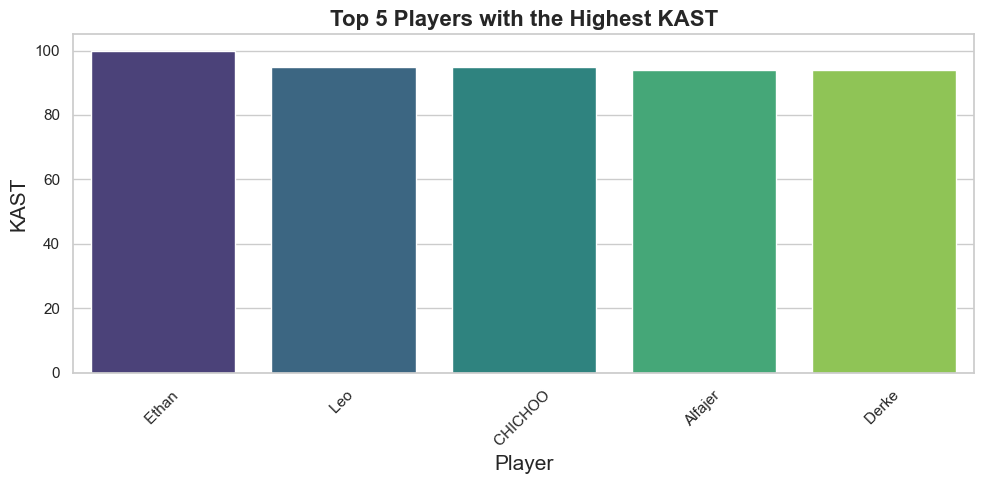

In [34]:
# This code creates a new figure with a size of 10x5 inches
plt.figure(figsize=(10,5))

# This code uses the Seaborn library to create a bar plot of the KAST values
# for the top 5 players. The bar plot is colored using the viridis palette.
sns.barplot(
    x="Player",
    y="KAST_all",
    data=top_5_players,
    palette="viridis",
)

# This code sets the labels for the x-axis and y-axis
plt.xlabel('Player', fontsize=15)
plt.ylabel('KAST', fontsize=15)

# This code sets the title of the pilot
plt.title('Top 5 Players with the Highest KAST', weight="bold", fontsize=16)

# This code rotates the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# This code ensures that all of the labels are visible
plt.tight_layout()

# This code shows the plot
plt.show()

## 10. How many matches in a day throughout the tournament

In [37]:
# This code converts the 'Date' column from an object to a datetime
# dtype.
vct_clean1['Date'] = pd.to_datetime(vct_clean1['Date'])

# This code checks the data type of the 'Date' column.
date_column_dtype = vct_clean1['Date'].dtypes

# This code prints the data type of the 'Date' column.
print(date_column_dtype)

datetime64[ns]


In [38]:
# This code first groups the vct_clean1 DataFrame by the 'Date' and 'VS'
# columns. The 'Date' column is the date of the match and the 'VS' column
# is the opposing team.
matches_per_day = vct_clean1.groupby([vct_clean1['Date'].dt.date, 'VS'])['Date'].count().groupby('Date')

# This code then counts the number of matches played on each day.
matches_per_day = matches_per_day.count()

# This code prints the results with enumeration for date and count.
print("Matches per day:")
for idx, (date, count) in enumerate(matches_per_day.items(), start=1):
    print(f"{idx}. Date: {date}, Count: {count}")

Matches per day:
1. Date: 2023-06-15, Count: 1
2. Date: 2023-06-16, Count: 2
3. Date: 2023-06-17, Count: 2
4. Date: 2023-06-18, Count: 1
5. Date: 2023-06-19, Count: 2
6. Date: 2023-06-20, Count: 2
7. Date: 2023-06-21, Count: 1
8. Date: 2023-06-23, Count: 1
9. Date: 2023-06-25, Count: 1


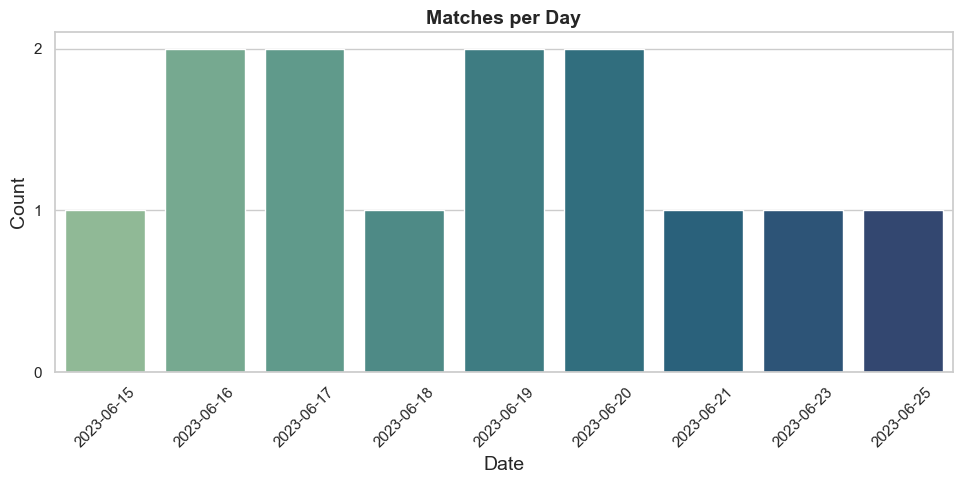

In [39]:
# This code creates a new figure with a size of 10x5 inches.
plt.figure(figsize=(10, 5))

# This code uses the Seaborn library to create a bar plot of the number of matches
# played per day. The bar plot is colored using the crest palette.
sns.barplot(x=matches_per_day.index, y=matches_per_day.values, palette='crest')

# This code sets the labels for the x-axis and y-axis.
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)

# This code sets the title of the plot.
plt.title('Matches per Day', weight='bold', fontsize=14)

# This code rotates the x-axis labels by 45 degrees.
plt.xticks(rotation=45)

# This code ensures that all of the labels are visible.
plt.tight_layout()

# This code sets the y-axis tick labels to integers.
plt.yticks(range(int(matches_per_day.max()) + 1))

# This code shows the plot.
plt.show()